In [12]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [14]:
# 2. Load and Preprocess Data
df = pd.read_csv("/content/churn_data (1).csv")
df.columns = df.columns.str.strip()
df.replace(" ", np.nan, inplace=True)
df = df.dropna()

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':
        df[col] = le.fit_transform(df[col])

In [15]:
# Optional: Normalize numeric columns
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

churn
0    11260
1     3556
Name: count, dtype: int64
churn
0    0.759989
1    0.240011
Name: proportion, dtype: float64


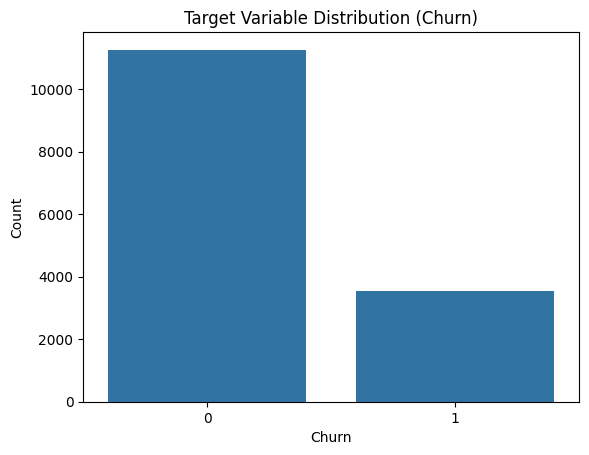

In [17]:
# 3. EDA: Class Balance
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True))

sns.countplot(x='churn', data=df)
plt.title("Target Variable Distribution (Churn)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


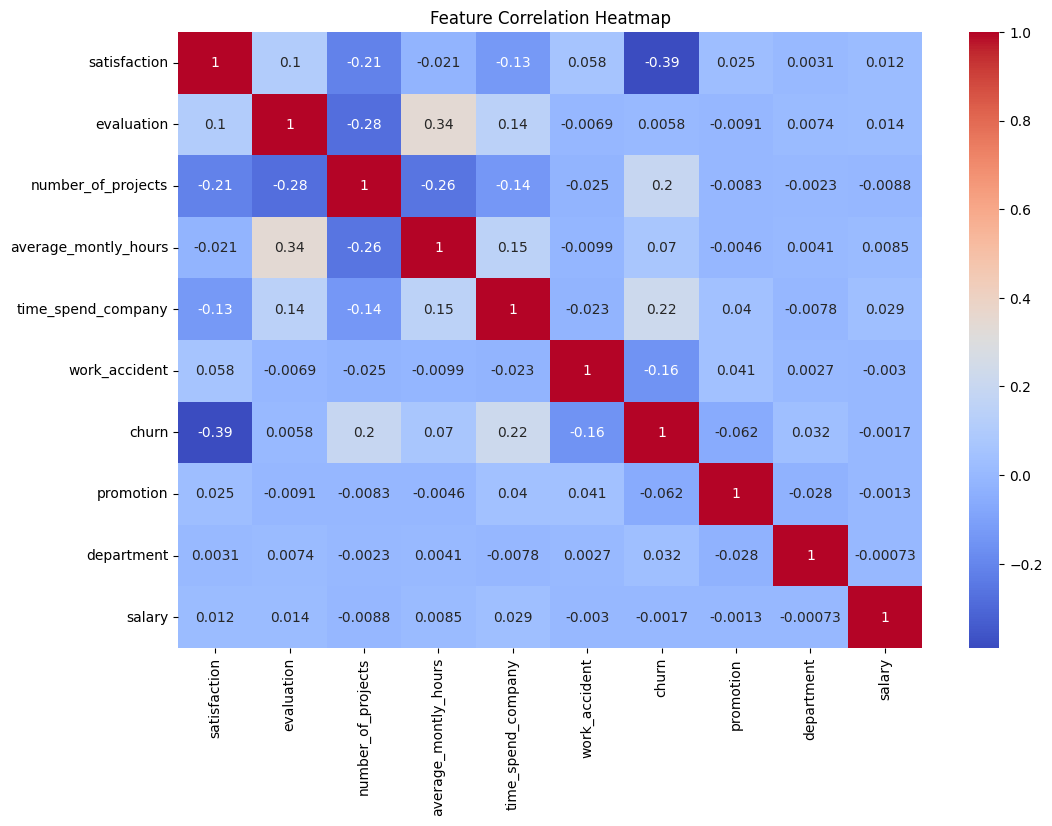

In [18]:
# 4. EDA: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [26]:
# 5. Feature and Target Split
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 6. Model Training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# 7. Hyperparameter Tuning on Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


In [29]:
# 8. Evaluation
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

In [30]:
# Add best RF
y_pred_rf = best_rf.predict(X_test)
results.append({
    'Model': "Random Forest (Tuned)",
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
})

results_df = pd.DataFrame(results)
print(results_df)

# 9. Final Prediction
sample = X_test.sample(5)
predicted = best_rf.predict(sample)
pd.DataFrame({
    'Predicted Churn': predicted
})



                   Model  Accuracy  Precision    Recall  F1 Score
0    Logistic Regression  0.755735   0.489305  0.255587  0.335780
1          Decision Tree  0.979082   0.944293  0.970670  0.957300
2          Random Forest  0.989541   0.988588  0.967877  0.978123
3                    SVM  0.777328   0.689189  0.142458  0.236111
4                    KNN  0.898448   0.762991  0.840782  0.800000
5  Random Forest (Tuned)  0.989204   0.985795  0.969274  0.977465


,Predicted Churn
0,0
1,0
2,0
3,0
4,0


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Predicted Churn']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Predicted Churn'}, axis=1)
              .sort_values('Predicted Churn', ascending=True))
  xs = counted['Predicted Churn']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('Predicted Churn', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Predicted Churn')
_ = plt.ylabel('count()')